In [1]:
import estimators
import utils

import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.rcParams.update(utils.get_plt_settings())

save=True


# Brüser

- berücksichtigt nur die Intervallschätzungen, deren qSQI > 0.4 ist
- informativ falls Coverage auf Segment >= 80%

                 precision    recall  f1-score   support

non-informative       0.55      0.92      0.69    411593
    informative       0.80      0.31      0.45    445535

       accuracy                           0.60    857128
      macro avg       0.67      0.61      0.57    857128
   weighted avg       0.68      0.60      0.56    857128

Relativer Fehler auf als informativ klassifizierten Segmenten: 9.94 Prozent
Relativer Fehler auf als informativ annotierten Segmenten:  2.60 Prozent
Absoluter Fehler auf als informativ klassifizierten Segmenten: 7.56 bpm
Absoluter Fehler auf als informativ annotierten Segmenten:  1.85 Prozent
Informative Segmente nach Brueser: 20.15
Informative Segmente nach Annotation: 51.98
Coverage klassifiziert: 9.27 %
Coverage annotiert: 43.22 %
Fehler < 5 Prozent/2.5bpm insgesamt: 32.61 %
Fehler < 5 Prozent/2.5bpm klassifiziert: 47.48 %
Fehler < 10 Prozent/5bpm insgesamt: 43.21 %
Fehler < 10 Prozent/5bpm klassifiziert: 64.19 %
Fehler < 15 Prozent/7.5bpm insg

/Users/zianor/Documents/git/Bachelorarbeit/Implementation/src/estimators.py:180: RuntimeWarning: Mean of empty slice
  return np.nanmean(data_subset['sqi_hr_diff_abs'])


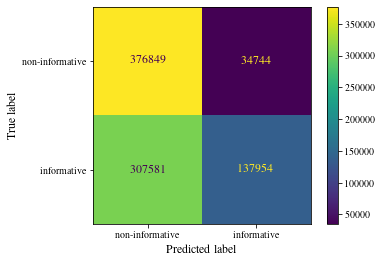

In [2]:
brueser = estimators.BrueserSingleSQI()
predicted = brueser.predict_all_labels()
labels = brueser.target
class_names = ['non-informative', 'informative']
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100

ConfusionMatrixDisplay(confusion_matrix(labels, predicted), display_labels=class_names).plot()
print(classification_report(labels, predicted, target_names=class_names))
print("Relativer Fehler auf als informativ klassifizierten Segmenten: %.2f Prozent" % brueser.get_mean_error_rel(brueser.target.index, predicted))
print("Relativer Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % brueser.get_mean_error_rel(brueser.target.index))
print("Absoluter Fehler auf als informativ klassifizierten Segmenten: %.2f bpm" % brueser.get_mean_error_abs(brueser.target.index, predicted))
print("Absoluter Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % brueser.get_mean_error_abs(brueser.target.index))
print("Informative Segmente nach Brueser: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)
brueser.print_model_test_report()

# Pino

- Schwellwerte

### 10 Sekunden, 1 Sekunde Schrittweite

                 precision    recall  f1-score   support

non-informative       0.45      0.03      0.05    411593
    informative       0.52      0.97      0.68    445535

       accuracy                           0.52    857128
      macro avg       0.48      0.50      0.36    857128
   weighted avg       0.48      0.52      0.38    857128

Relativer Fehler auf als informativ klassifizierten Segmenten: 2.59 Prozent
Relativer Fehler auf als informativ annotierten Segmenten:  2.60 Prozent
Absoluter Fehler auf als informativ klassifizierten Segmenten: 1.85 bpm
Absoluter Fehler auf als informativ annotierten Segmenten:  1.85 Prozent
Informative Segmente nach Pino: 96.98
Informative Segmente nach Annotation: 51.98
Coverage klassifiziert: 96.43 %
Coverage annotiert: 43.22 %
Fehler < 5 Prozent/2.5bpm insgesamt: 32.61 %
Fehler < 5 Prozent/2.5bpm klassifiziert: 32.55 %
Fehler < 10 Prozent/5bpm insgesamt: 43.21 %
Fehler < 10 Prozent/5bpm klassifiziert: 43.02 %
Fehler < 15 Prozent/7.5bpm insges

/Users/zianor/Documents/git/Bachelorarbeit/Implementation/src/estimators.py:113: RuntimeWarning: Mean of empty slice
  return np.nanmean(data_subset['abs_err'])


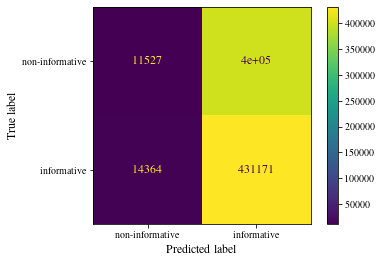

In [3]:
pino = estimators.PinoMinMaxStd()
predicted = pino.predict_all_labels()
labels = pino.target
class_names = ['non-informative', 'informative']
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100

ConfusionMatrixDisplay(confusion_matrix(labels, predicted), display_labels=class_names).plot()
print(classification_report(labels, predicted, target_names=class_names))
print("Relativer Fehler auf als informativ klassifizierten Segmenten: %.2f Prozent" % pino.get_mean_error_rel(pino.target.index, predicted))
print("Relativer Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % pino.get_mean_error_rel(pino.target.index))
print("Absoluter Fehler auf als informativ klassifizierten Segmenten: %.2f bpm" % pino.get_mean_error_abs(pino.target.index, predicted))
print("Absoluter Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % pino.get_mean_error_abs(pino.target.index))
print("Informative Segmente nach Pino: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)
pino.print_model_test_report()

### 4 Sekunden, 1 Sekunde Schrittweite

                 precision    recall  f1-score   support

non-informative       0.55      0.02      0.03    461505
    informative       0.46      0.99      0.63    395607

       accuracy                           0.46    857112
      macro avg       0.51      0.50      0.33    857112
   weighted avg       0.51      0.46      0.31    857112

Relativer Fehler auf als informativ klassifizierten Segmenten: 2.59 Prozent
Relativer Fehler auf als informativ annotierten Segmenten:  2.60 Prozent
Absoluter Fehler auf als informativ klassifizierten Segmenten: 1.86 bpm
Absoluter Fehler auf als informativ annotierten Segmenten:  1.87 Prozent
Informative Segmente nach Pino: 98.54
Informative Segmente nach Annotation: 46.16
Coverage klassifiziert: 98.23 %
Coverage annotiert: 37.63 %
Fehler < 5 Prozent/2.5bpm insgesamt: 28.55 %
Fehler < 5 Prozent/2.5bpm klassifiziert: 28.63 %
Fehler < 10 Prozent/5bpm insgesamt: 37.62 %
Fehler < 10 Prozent/5bpm klassifiziert: 37.66 %
Fehler < 15 Prozent/7.5bpm insges

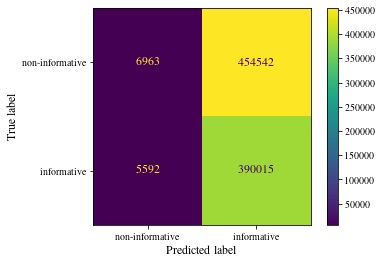

In [4]:
pino = estimators.PinoMinMaxStd(segment_length=4, overlap_amount=0.75)
predicted = pino.predict_all_labels()
labels = pino.target
class_names = ['non-informative', 'informative']
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100

ConfusionMatrixDisplay(confusion_matrix(labels, predicted), display_labels=class_names).plot()
print(classification_report(labels, predicted, target_names=class_names))
print("Relativer Fehler auf als informativ klassifizierten Segmenten: %.2f Prozent" % pino.get_mean_error_rel(pino.target.index, predicted))
print("Relativer Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % brueser.get_mean_error_rel(pino.target.index))
print("Absoluter Fehler auf als informativ klassifizierten Segmenten: %.2f bpm" % pino.get_mean_error_abs(pino.target.index, predicted))
print("Absoluter Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % pino.get_mean_error_abs(pino.target.index))
print("Informative Segmente nach Pino: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)
pino.print_model_test_report()

# LDA Paper

                 precision    recall  f1-score   support

non-informative       0.68      0.18      0.29    144044
    informative       0.45      0.89      0.60    109659

       accuracy                           0.49    253703
      macro avg       0.57      0.53      0.44    253703
   weighted avg       0.58      0.49      0.42    253703

Relativer Fehler auf als informativ klassifizierten Segmenten: 3.16 Prozent
Relativer Fehler auf als informativ annotierten Segmenten:  3.29 Prozent
Absoluter Fehler auf als informativ klassifizierten Segmenten: 2.28 bpm
Absoluter Fehler auf als informativ annotierten Segmenten:  2.41 Prozent
Coverage klassifiziert: 84.82 %
Coverage annotiert: 43.22 %
Fehler < 5 Prozent/2.5bpm insgesamt: 32.61 %
Fehler < 5 Prozent/2.5bpm klassifiziert: 34.95 %
Fehler < 10 Prozent/5bpm insgesamt: 43.21 %
Fehler < 10 Prozent/5bpm klassifiziert: 45.20 %
Fehler < 15 Prozent/7.5bpm insgesamt: 51.64 %
Fehler < 15 Prozent/7.5bpm klassifiziert: 53.01 %
Fehler < 20 Prozent

/Users/zianor/Documents/git/Bachelorarbeit/Implementation/src/estimators.py:120: RuntimeWarning: Mean of empty slice
  return np.nanmean(data_subset['abs_err'])


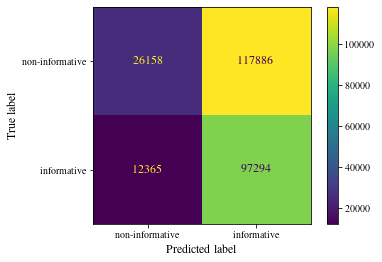

In [3]:
lda = estimators.MLStatisticalEstimator("LDA_hr10")
y_pred, y_true = lda.predict_test_set()

class_names = ['non-informative', 'informative']
coverage = len(y_pred[y_pred])/len(y_true.index)*100
coverage_annotated = len(y_true[y_true])/len(y_true.index)*100

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_names).plot()
print(classification_report(y_true, y_pred, target_names=class_names))

print("Relativer Fehler auf als informativ klassifizierten Segmenten: %.2f Prozent" % lda.get_mean_error_rel(y_true.index, y_pred))
print("Relativer Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % lda.get_mean_error_rel(y_true.index))
print("Absoluter Fehler auf als informativ klassifizierten Segmenten: %.2f bpm" % lda.get_mean_error_abs(y_true.index, y_pred))
print("Absoluter Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % lda.get_mean_error_abs(y_true.index))
lda.print_model_test_report()

# Random Forest Paper

In [ ]:
rf = estimators.MLStatisticalEstimator("RF_hr10")
y_pred, y_true = rf.predict_test_set()

class_names = ['non-informative', 'informative']
coverage = len(y_pred[y_pred])/len(y_true.index)*100
coverage_annotated = len(y_true[y_true])/len(y_true.index)*100

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_names).plot()
print(classification_report(y_true, y_pred, target_names=class_names))

print("Relativer Fehler auf als informativ klassifizierten Segmenten: %.2f Prozent" % rf.get_mean_error_rel(y_true.index, y_pred))
print("Relativer Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % rf.get_mean_error_rel(y_true.index))
print("Absoluter Fehler auf als informativ klassifizierten Segmenten: %.2f bpm" % rf.get_mean_error_abs(y_true.index, y_pred))
print("Absoluter Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % rf.get_mean_error_abs(y_true.index))
rf.print_model_test_report()


# Decision Tree Paper

In [ ]:
dt = estimators.MLStatisticalEstimator("DT_hr10")
y_pred, y_true = dt.predict_test_set()

class_names = ['non-informative', 'informative']
coverage = len(y_pred[y_pred])/len(y_true.index)*100
coverage_annotated = len(y_true[y_true])/len(y_true.index)*100

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_names).plot()
print(classification_report(y_true, y_pred, target_names=class_names))

print("Relativer Fehler auf als informativ klassifizierten Segmenten: %.2f Prozent" % dt.get_mean_error_rel(y_true.index, y_pred))
print("Relativer Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % dt.get_mean_error_rel(y_true.index))
print("Absoluter Fehler auf als informativ klassifizierten Segmenten: %.2f bpm" % dt.get_mean_error_abs(y_true.index, y_pred))
print("Absoluter Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % dt.get_mean_error_abs(y_true.index))
dt.print_model_test_report()

# MLP Paper

In [ ]:
mlp = estimators.MLStatisticalEstimator("DT_hr10")
y_pred, y_true = mlp.predict_test_set()

class_names = ['non-informative', 'informative']
coverage = len(y_pred[y_pred])/len(y_true.index)*100
coverage_annotated = len(y_true[y_true])/len(y_true.index)*100

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_names).plot()
print(classification_report(y_true, y_pred, target_names=class_names))

print("Relativer Fehler auf als informativ klassifizierten Segmenten: %.2f Prozent" % mlp.get_mean_error_rel(y_true.index, y_pred))
print("Relativer Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % mlp.get_mean_error_rel(y_true.index))
print("Absoluter Fehler auf als informativ klassifizierten Segmenten: %.2f bpm" % mlp.get_mean_error_abs(y_true.index, y_pred))
print("Absoluter Fehler auf als informativ annotierten Segmenten:  %.2f Prozent" % mlp.get_mean_error_abs(y_true.index))
mlp.print_model_test_report()

In [ ]:
import numpy as np

def get_mean_error_abs(indices, labels, informative_info):
    data_subset = informative_info.loc[indices]
    if labels is not None:
        data_subset = data_subset[labels]
        data_subset['abs_err'] = data_subset['abs_err'].replace(np.inf, np.nan)
    return np.nanmean(data_subset['abs_err'])

def get_mean_error_rel(indices, labels, informative_info):
    data_subset = informative_info.loc[indices]
    if labels is not None:
        data_subset = data_subset[labels]
    data_subset['rel_err'] = data_subset['rel_err'].replace(np.inf, np.nan)
    return np.nanmean(data_subset['rel_err'])

In [ ]:
import pickle
import os
import utils
from ml_statistical_features import get_patient_split, load_data

x, y, patient_id, informative_info = load_data(10, 0.9, 10)

path = os.path.join(utils.get_grid_params_path(), 'RF_hr10')
with open(os.path.join(path, 'fitted_model.sav'), 'rb') as file:
    rf = pickle.load(file)
    
_, x_test, _, y_test, _, _ = get_patient_split(x, y, test_size=0.33, patient_id=patient_id)
y_pred = rf.predict(x_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=class_names).plot()

class_names = ['non-informative', 'informative']
coverage = len(y_pred[y_pred])/len(y_test.index)*100
coverage_annotated = len(y_test[y_test])/len(y_test.index)*100

print(classification_report(y_test, y_pred, target_names=class_names))
print("Relativer Fehler auf als informativ klassifizierten Segmenten: %.2f Prozent" % get_mean_error_rel(x_test.index, y_pred, informative_info))
print("Absoluter Fehler auf als informativ klassifizierten Segmenten: %.2f bpm" % get_mean_error_abs(x_test.index, y_pred, informative_info))
print("Informative Segmente nach Klassifikator: %.2f" % coverage)
print("Informative Segmente mit nicht ermittelbarer Herzrate: %d" % len(y_pred[np.isnan(y_pred)]))
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)
# TODO: 5%, 2,5 bpm und 15%, 7,5 bpm coverage auf fn und p
# TODO boxplot error

In [ ]:
from sklearn.metrics import plot_roc_curve

rf_single = rf.best_estimator_['clf']
plot_roc_curve(rf_single, x_test, y_test)